In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io

from skimage import img_as_float
from tqdm import tqdm_notebook

## T1

In [2]:
def gaussian_eq(x, mean, var):
    return np.diagonal(np.exp(-0.5 * (x - mean).dot(np.linalg.inv(var)).dot((x - mean).T))
                       / np.sqrt(2*np.pi * np.linalg.det(var)))

def soft_em(data, k, means, iters):
    # Initialize step
    m = np.array([1/k] * k, dtype=float)
    var = np.array([np.identity(2) for i in range(k)], dtype=float)
    
    for it in range(iters):
        # Expectation
        w = np.zeros((data.shape[0], k))
        for j in range(k):
            w[:, j] = gaussian_eq(data, means[j], var[j]) * m[j]
        w = np.divide(w, np.sum(w, axis=1)[:, None])
        
        # Maximization
        for j in range(k):
            m[j] = w[:, j].sum() / data.shape[0]
            var_j = np.zeros((2, 2))
            for i in range(data.shape[0]):
                var_j += w[i, j] * (data[i] - mean[j]).T.dot(data[i] - mean[j])
            var_j /= np.sum(w[:, j])
            var_j[0, 1] = var_j[1, 0] = 0
            var[j] = var_j
            mean[j] = np.sum(data * w[:, j].reshape(-1, 1)) / np.sum(w[:, j])
            
        # Display Result
        print("Iteration: ", it)
        print("w: ", w)
        print("m: ", m)
        print("Cov: ", var)
        print("\n", "="*50, "\n")
    return w

In [3]:
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.array([data_x, data_y]).T
data

array([[ 1,  2],
       [ 3,  3],
       [ 2,  2],
       [ 8,  8],
       [ 6,  6],
       [ 7,  7],
       [-3, -3],
       [-2, -4],
       [-7, -7]])

In [4]:
mean_x = np.array([3, 2, -3])
mean_y = np.array([3, 2, -3])
mean = np.array([mean_x, mean_y]).T
mean

array([[ 3,  3],
       [ 2,  2],
       [-3, -3]])

In [5]:
w = soft_em(data, 3, mean, 3)

Iteration:  0
w:  [[1.19202922e-01 8.80797076e-01 1.81545808e-09]
 [7.31058579e-01 2.68941421e-01 1.69570706e-16]
 [2.68941421e-01 7.31058579e-01 1.01529005e-11]
 [9.99983299e-01 1.67014218e-05 2.03105874e-42]
 [9.99088949e-01 9.11051194e-04 5.37528453e-32]
 [9.99876605e-01 1.23394576e-04 3.30529272e-37]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [3.30570063e-37 5.90009054e-29 1.00000000e+00]]
m:  [0.45757242 0.20909425 0.33333333]
Cov:  [[[24.55293548  0.        ]
  [ 0.         24.55293548]]

 [[ 0.77328542  0.        ]
  [ 0.          0.77328542]]

 [[11.33333335  0.        ]
  [ 0.         11.33333335]]]


Iteration:  1
w:  [[4.19395510e-02 9.57161798e-01 8.98651358e-04]
 [5.05955731e-03 9.94937945e-01 2.49794320e-06]
 [9.18771589e-03 9.90754462e-01 5.78225470e-05]
 [1.00000000e+00 1.90667375e-13 3.52704929e-10]
 [9.99645793e-01 3.54072158e-04 1.34732744e-07]
 [9.99999964e-01 2.87538099e-08 7.23021595e-09]
 [1.95938980e-03 5.037

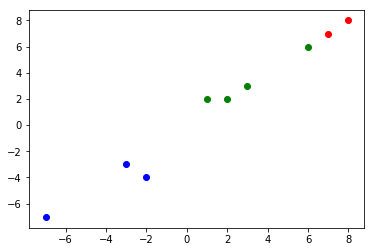

In [6]:
clusters = [[] for i in range(w.shape[1])]
for i, row in enumerate(w):
    clusters[np.argmax(row)].append(data[i])
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=["red", "green", "blue"][i])
plt.show()

# The face database

In [7]:
x = scipy.io.loadmat("facedata.mat")

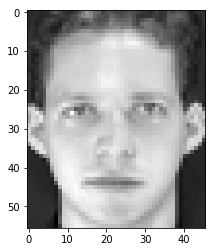

In [8]:
plt.imshow(x['facedata'][0, 0], cmap="gray")
plt.show()

In [9]:
xf = {}
for i in range(x['facedata'].shape[0]):
    for j in range(x['facedata'].shape[1]):
        xf[i, j] = img_as_float(x['facedata'][i, j])

In [10]:
def mat_to_vec(m):
    return m.reshape(1, -1)
def euclidean_dist(t, d):
    return np.sqrt(np.sum((t - d)**2))

## T6

In [11]:
def similar_mat(T, D):
    A = np.zeros((T.shape[0], D.shape[0]))
    for i, t in enumerate(T):
        for j, d in enumerate(D):
            A[i, j] = euclidean_dist(mat_to_vec(t), mat_to_vec(d))
    return A

In [12]:
T = []
D = []
for i in range(40):
    for j in range(3):
        T.append(xf[i, j])
    for j in range(3, 10):
        D.append(xf[i, j])
T = np.array(T)
D = np.array(D)

A = similar_mat(T, D)

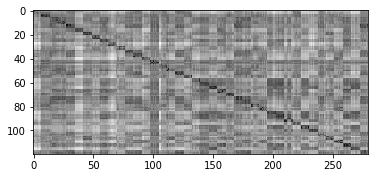

In [13]:
plt.imshow(A, cmap="gray")
plt.show()

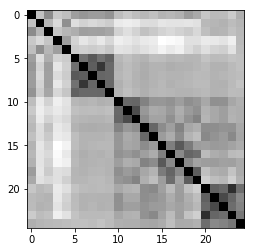

In [14]:
tmp_vec = []
for i in range(5):
    for j in range(5):
        tmp_vec.append(xf[i, j])
tmp_vec = np.array(tmp_vec)
A_tmp = similar_mat(tmp_vec, tmp_vec)

plt.imshow(A_tmp, cmap="gray")
plt.show()

## T7

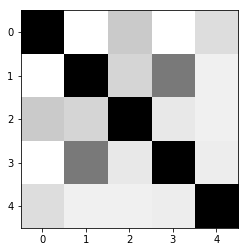

In [15]:
plt.imshow(A_tmp[5:10, 5:10], cmap="gray")
plt.show()

## T8

In [16]:
def report_predict(A, t):
    tp = fp = tn = fn = 0
    for j in range(A.shape[1]):
        for i in range(0, A.shape[0], 3):
            dist = np.min(A[i:i+3, j])
            j_person = j // 7
            i_person = i // 3
            predict = 1.0 if dist < t else 0.0
            if predict == 1.0 and i_person == j_person:
                tp += 1
            elif predict == 1.0 and i_person != j_person:
                fp += 1
            elif predict == 0.0 and i_person == j_person:
                fn += 1
            elif predict == 0.0 and i_person != j_person:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return np.array([tpr, fpr])

In [17]:
report_predict(A, 10)

array([0.99642857, 0.45641026])

## T9 & T10

In [18]:
t_range = np.linspace(5, 10, 1000)
roc = np.array([report_predict(A, t) for t in tqdm_notebook(t_range)])

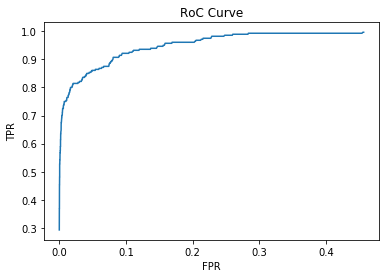

In [19]:
plt.plot(roc[:, 1], roc[:, 0])
plt.title("RoC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [20]:
roc[(roc[:, 1] >= 0.00095) & (roc[:, 1] <= 0.00105)]

array([[0.54285714, 0.00100733],
       [0.54642857, 0.00100733],
       [0.54642857, 0.00100733]])

In [21]:
roc[np.abs(roc[:, 1] - 1 + roc[:, 0]) <= 0.001]

array([[0.91071429, 0.08956044],
       [0.91071429, 0.08992674]])

In [22]:
np.abs(roc[:, 1] - roc[:, 0])

array([0.29285714, 0.29285714, 0.29285714, 0.29285714, 0.29285714,
       0.29285714, 0.29285714, 0.29285714, 0.29285714, 0.29285714,
       0.29642857, 0.29642857, 0.3       , 0.30357143, 0.30357143,
       0.31071429, 0.31428571, 0.31785714, 0.32142857, 0.32142857,
       0.32857143, 0.33214286, 0.33571429, 0.33571429, 0.33571429,
       0.33928571, 0.33928571, 0.33928571, 0.33928571, 0.33928571,
       0.33928571, 0.34285714, 0.34285714, 0.34276557, 0.34276557,
       0.34276557, 0.34276557, 0.34276557, 0.34276557, 0.346337  ,
       0.346337  , 0.346337  , 0.346337  , 0.35347985, 0.35705128,
       0.35705128, 0.36062271, 0.36062271, 0.36062271, 0.36062271,
       0.36419414, 0.36419414, 0.36776557, 0.36776557, 0.36767399,
       0.37124542, 0.37124542, 0.37124542, 0.37124542, 0.37124542,
       0.37481685, 0.37481685, 0.37481685, 0.38195971, 0.38195971,
       0.38195971, 0.38195971, 0.38195971, 0.38195971, 0.38195971,
       0.38195971, 0.38195971, 0.38195971, 0.38553114, 0.38553